In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import seaborn as sns

In [98]:
df = pd.read_csv("C:/AI_File/car_evaluation.csv",header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [99]:
df.columns=['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety',
       'output']
df

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [100]:
df.columns

Index(['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety',
       'output'],
      dtype='object')

In [101]:
# 결측치 확인
print("\n 결측값 확인:")
print(df.isnull().sum())


 결측값 확인:
price           0
maint           0
doors           0
persons         0
lug_capacity    0
safety          0
output          0
dtype: int64


In [102]:
# 레이블 갯수 확인 (변환 전)
df['output'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: output, dtype: int64

In [103]:
# 레이블 갯수 확인 (변환 후)
df['output'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: output, dtype: int64

In [104]:
X = df.drop('output', axis=1)
y = df['output']

In [105]:
X.head()

,price,maint,doors,persons,lug_capacity,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [106]:
y.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: output, dtype: int64

In [107]:
X

,price,maint,doors,persons,lug_capacity,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [108]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: output, Length: 1728, dtype: object

# 딥러닝

In [109]:
#원-핫 인코딩
X_encoded = pd.get_dummies(X)
y_encoded = pd.get_dummies(y)

In [110]:
X = X_encoded.values
Y = y_encoded.values

In [111]:
Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [112]:
X

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 0, 0]], dtype=uint8)

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [114]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1382, 21), (346, 21), (1382, 4), (346, 4))

In [115]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


In [118]:
#인공신경망 모델
model = Sequential()

model.add(Dense(32,input_shape=(21,),activation='relu')) 
#input_shape=(n,)에서 n은 한 개의 샘플이 가진 피처(열)의 개수

model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(Dense(4,activation='softmax'))

model.compile(Adam(learning_rate=0.005),'categorical_crossentropy',metrics=['accuracy'])
#다중 클래스 categorical_crossentropy 사용
#이진 클래스 binary_crossentropy 사용
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                704       
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 8)                 136       
                                                                 
 dense_27 (Dense)            (None, 4)                 36        
                                                                 
Total params: 1,404
Trainable params: 1,404
Non-trainable params: 0
_________________________________________________________________


In [119]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
39/39 [==============================] - 0s 4ms/step - loss: 0.8474 - accuracy: 0.6943 - val_loss: 0.5602 - val_accuracy: 0.7266
Epoch 2/30
39/39 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.7257 - val_loss: 0.3447 - val_accuracy: 0.8777
Epoch 3/30
39/39 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8673 - val_loss: 0.2397 - val_accuracy: 0.9065
Epoch 4/30
39/39 [==============================] - 0s 2ms/step - loss: 0.2511 - accuracy: 0.8833 - val_loss: 0.1947 - val_accuracy: 0.9209
Epoch 5/30
39/39 [==============================] - 0s 1ms/step - loss: 0.2097 - accuracy: 0.8906 - val_loss: 0.1736 - val_accuracy: 0.9137
Epoch 6/30
39/39 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.9019 - val_loss: 0.1572 - val_accuracy: 0.9281
Epoch 7/30
39/39 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9276 - val_loss: 0.1444 - val_accuracy: 0.9568
Epoch 8/30
39/39 [==

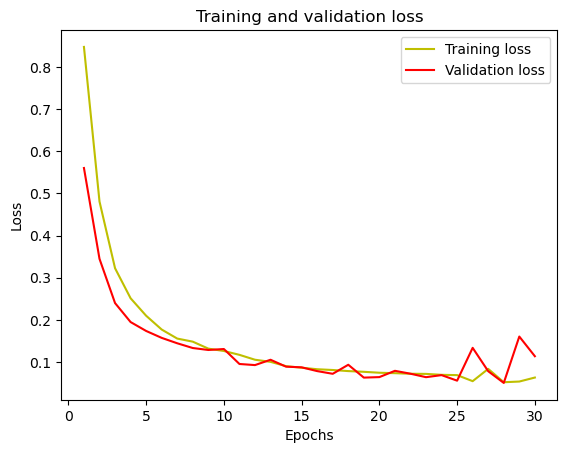

In [120]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

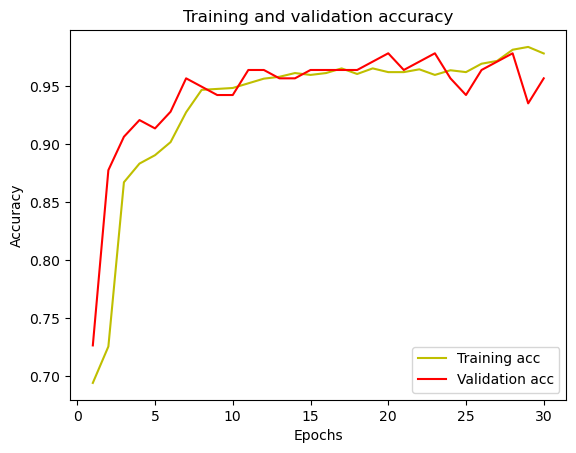

In [121]:

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [122]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [123]:

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        79
           1       0.80      0.94      0.86        17
           2       0.98      1.00      0.99       240
           3       1.00      0.70      0.82        10

    accuracy                           0.97       346
   macro avg       0.94      0.89      0.91       346
weighted avg       0.98      0.97      0.97       346

[[ 74   1   4   0]
 [  1  16   0   0]
 [  0   0 240   0]
 [  0   3   0   7]]
